* Data Collection Reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-01-read_html.ipynb
* Data analysis reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-02-eda.ipynb

In [1]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2020-08-18


In [2]:
import pandas as pd
import numpy as np

In [3]:
url = "http://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [4]:
table = pd.read_html(url)
table

[   종로구   중구  용산구  성동구  광진구  동대문구  중랑구  성북구  강북구  도봉구  노원구  은평구 서대문구
 0   33   28   70   67   43    63   59  132   39   84   82   85   48
 1  마포구  양천구  강서구  구로구  금천구  영등포구  동작구  관악구  서초구  강남구  송파구  강동구   기타
 2   69   81  128   93   42    79   81  156   86  111  122   61  135,
     종로구   중구  용산구  성동구  광진구 동대문구
 0    33   28   70   67   43   63
 1   중랑구  성북구  강북구  도봉구  노원구  은평구
 2    59  132   39   84   82   85
 3  서대문구  마포구  양천구  강서구  구로구  금천구
 4    48   69   81  128   93   42
 5  영등포구  동작구  관악구  서초구  강남구  송파구
 6    79   81  156   86  111  122
 7   강동구   기타  NaN  NaN  NaN  NaN
 8    61  135  NaN  NaN  NaN  NaN,
      소계  해외접촉관련  성북구사랑제일교회  용인시우리제일교회  양천구되새김교회  관악구요양병원관련  롯데리아종사자모임  \
 0  2077     375        209         40        10         10         13   
 
    고양시반석교회(케네디상가)  강서구요양시설관련  강남구사무실관련  리치웨이관련  이태원클럽관련  구로구콜센터관련  \
 0              11         26        29     122      139        98   
 
    타 시·도확진자접촉자   기타  경로확인중  
 0           67  722    206  ,
                             

In [5]:
table[6]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,2077,15503,8.16.,송파구,-,성북구 사랑제일교회 관련,병상 배정 중
1,2076,15506,8.16.,강동구,-,성북구 사랑제일교회 관련,서남병원
2,2075,15486,8.16.,남양주시,-,성북구 사랑제일교회 관련,서울의료원
3,2074,15458,8.16.,노원구,-,중랑구 확진자 접촉,서울의료원
4,2073,15477,8.16.,동대문구,-,관악구 확진자 접촉,병상 배정 중
...,...,...,...,...,...,...,...
2072,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
2073,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
2074,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
2075,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [6]:
df = table[6]
df.shape

(2077, 7)

In [7]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,2077,15503,8.16.,송파구,-,성북구 사랑제일교회 관련,병상 배정 중
1,2076,15506,8.16.,강동구,-,성북구 사랑제일교회 관련,서남병원
2,2075,15486,8.16.,남양주시,-,성북구 사랑제일교회 관련,서울의료원
3,2074,15458,8.16.,노원구,-,중랑구 확진자 접촉,서울의료원
4,2073,15477,8.16.,동대문구,-,관악구 확진자 접촉,병상 배정 중


In [8]:
last_day = df.loc[0, "확진일"]
last_day = last_day.replace(".", "_")
last_day

'8_16_'

In [9]:
dataset_path = "dataset/"
file_name = f"seoul_covid_{last_day}.csv"
file_path = dataset_path + file_name
file_path

'dataset/seoul_covid_8_16_.csv'

In [10]:
df.to_csv(file_path, index=False)

In [11]:
pd.read_csv(file_path)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,2077,15503,8.16.,송파구,-,성북구 사랑제일교회 관련,병상 배정 중
1,2076,15506,8.16.,강동구,-,성북구 사랑제일교회 관련,서남병원
2,2075,15486,8.16.,남양주시,-,성북구 사랑제일교회 관련,서울의료원
3,2074,15458,8.16.,노원구,-,중랑구 확진자 접촉,서울의료원
4,2073,15477,8.16.,동대문구,-,관악구 확진자 접촉,병상 배정 중
...,...,...,...,...,...,...,...
2072,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
2073,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
2074,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
2075,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [12]:
# sort according to the column value
df = df.sort_values(["연번"], ascending=False)
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,2077,15503,8.16.,송파구,-,성북구 사랑제일교회 관련,병상 배정 중
1,2076,15506,8.16.,강동구,-,성북구 사랑제일교회 관련,서남병원
2,2075,15486,8.16.,남양주시,-,성북구 사랑제일교회 관련,서울의료원
3,2074,15458,8.16.,노원구,-,중랑구 확진자 접촉,서울의료원
4,2073,15477,8.16.,동대문구,-,관악구 확진자 접촉,병상 배정 중


In [13]:
df["확진일"].value_counts()

8.15.    146
8.16.     90
8.14.     73
3.10.     46
8.13.     33
        ... 
4.20.      1
4.24.      1
4.30.      1
2.6.       1
5.31.      1
Name: 확진일, Length: 178, dtype: int64

In [14]:
df["확진일"].head(4)

0    8.16.
1    8.16.
2    8.16.
3    8.16.
Name: 확진일, dtype: object

In [15]:
# transform date(string) into datetime object
df["확진일자"] = pd.to_datetime("2020"+"-"+df["확진일"].str.replace(".","-"))
df["확진일자"].head()

0   2020-08-16
1   2020-08-16
2   2020-08-16
3   2020-08-16
4   2020-08-16
Name: 확진일자, dtype: datetime64[ns]

In [16]:
# extract month, add column for the month
df["월"] = df["확진일자"].dt.month

In [17]:
# extract week, add column for the week
df["주"] = df["확진일자"].dt.week

In [18]:
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
0,2077,15503,8.16.,송파구,-,성북구 사랑제일교회 관련,병상 배정 중,2020-08-16,8,33,08-16
1,2076,15506,8.16.,강동구,-,성북구 사랑제일교회 관련,서남병원,2020-08-16,8,33,08-16
2,2075,15486,8.16.,남양주시,-,성북구 사랑제일교회 관련,서울의료원,2020-08-16,8,33,08-16


## Visualization

In [19]:
import matplotlib.pyplot as plt

# font designation
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

In [20]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

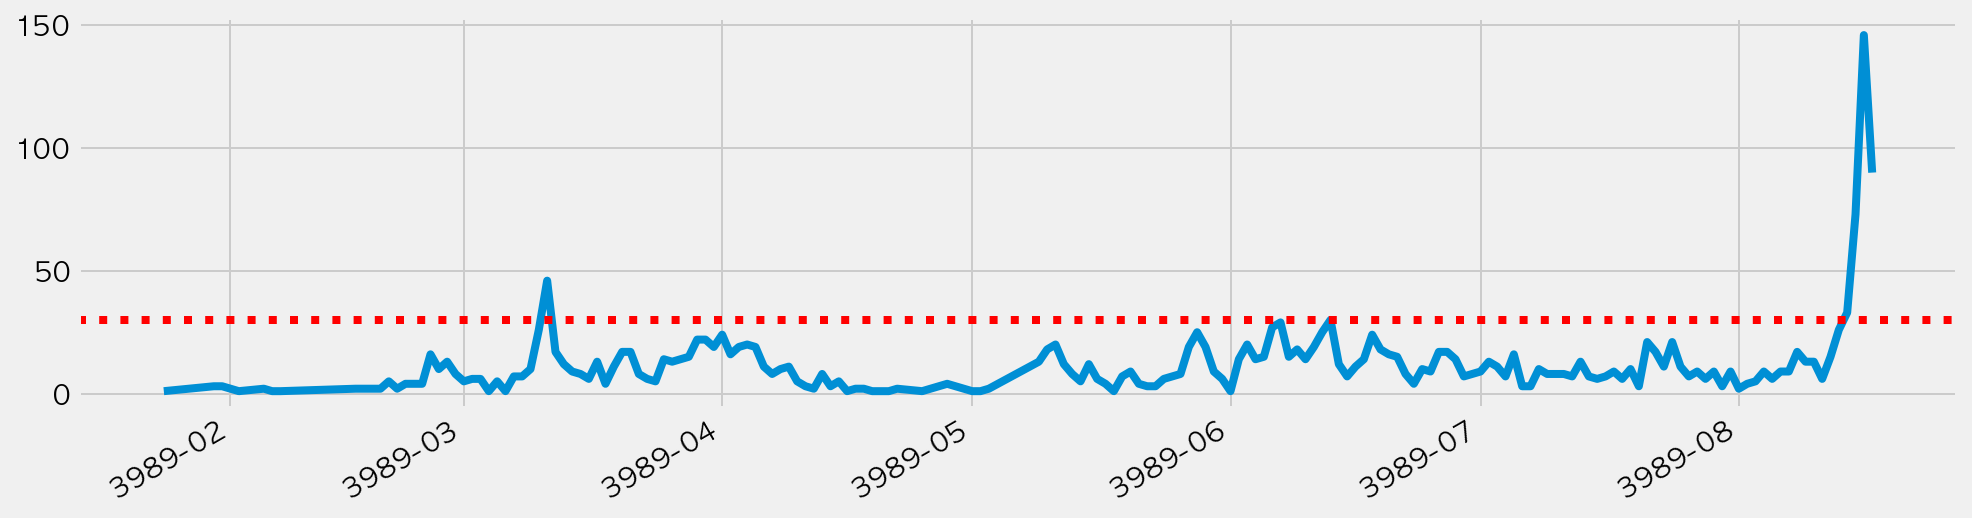

In [21]:
df["확진일자"].value_counts().sort_index().plot(figsize=(15,4), rot=30, grid=True)
plt.axhline(30, linestyle=":", color="red")

In [22]:
df.head(4)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
0,2077,15503,8.16.,송파구,-,성북구 사랑제일교회 관련,병상 배정 중,2020-08-16,8,33,08-16
1,2076,15506,8.16.,강동구,-,성북구 사랑제일교회 관련,서남병원,2020-08-16,8,33,08-16
2,2075,15486,8.16.,남양주시,-,성북구 사랑제일교회 관련,서울의료원,2020-08-16,8,33,08-16
3,2074,15458,8.16.,노원구,-,중랑구 확진자 접촉,서울의료원,2020-08-16,8,33,08-16


In [23]:
day_count = df["월일"].value_counts().sort_index()
day_count.describe()

count    177.000000
mean      11.734463
std       14.714812
min        1.000000
25%        5.000000
50%        9.000000
75%       15.000000
max      146.000000
Name: 월일, dtype: float64

In [24]:
day_count

01-24      1
01-30      3
01-31      3
02-02      1
02-05      2
        ... 
08-12     26
08-13     33
08-14     73
08-15    146
08-16     90
Name: 월일, Length: 177, dtype: int64

In [25]:
day_count[day_count == day_count.max()]

08-15    146
Name: 월일, dtype: int64

In [26]:
df[df["월일"]=="03-10"].head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1875,202,7567,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1876,201,7711,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1877,200,7555,3.10.,구로구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1878,199,7725,3.10.,양천구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1879,198,7539,3.10.,양천구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10


In [27]:
df["접촉력"].value_counts().head(20)

해외 접촉 추정         352
성북구 사랑제일교회 관련    209
확인 중             191
이태원 클럽 관련        139
리치웨이 관련          119
구로구 콜센터 관련        60
타시도 확진자 접촉        58
양천구 운동시설 관련       43
요양시설 관련           43
확인중               42
구로구 교회 관련         41
용인시 우리제일교회 관련     40
콜센터직원 접촉          37
수도권 개척교회 관련       37
강남구 사무실 관련        36
왕성교회 관련           30
동대문구 관련           28
부천시 쿠팡 관련         24
해외 접촉             22
송파구 교회관련          19
Name: 접촉력, dtype: int64

In [28]:
df["접촉력"].unique()

array(['성북구 사랑제일교회 관련', '중랑구 확진자 접촉', '관악구 확진자 접촉', '확인 중', '#14678 접촉',
       '해외 접촉 추정', '양천구 되새김교회', '용인시 우리제일교회 관련', '성동구 확진자 접촉',
       '용산구 확진자 접촉', '타시도 확진자 접촉', '강북구 확진자 접촉', '도봉구 확진자 접촉',
       '동대문 확진자 접촉', '관악구 요양병원', '광진구 확진자 접촉', '서초구 확진자 접촉',
       '동대문구 확진자 접촉', '구로구 확진자 접촉', '은평구 확진자 접촉', '롯데리아 종사자 모임',
       '노원구 확진자 접촉', '고양시 반석교회 관련(케네디상가)', '중구 통일상가', '양천구 확진자 접촉',
       '영등포구 확진자 접촉', '강남구 확진자 접촉', '강남구 판매업소', '종로구 확진자 접촉',
       '성북구 확진자 접촉', '마포구 확진자 접촉', '#14483 접촉', '성동구 가족관련', '#14488 접촉',
       '도봉구 가족관련', '강남구 커피전문점', '선교회 소모임', '송파구 교회관련', '강서구 확진자 접촉',
       '송파구 확진자 접촉', '종로구 지인모임 신명투자', '강서구 요양시설관련', '강남구 사무실 K빌딩',
       '송파구 지인모임', '중구 확진자 접촉', '관악구 사무실 관련', '강남구 사무실 관련', '동작구 확진자 접촉',
       '강남역삼동 금융회사', '확인중', '강서구 요양시설 관련', '강남구 이동통신 종사자', '강남구 역삼동 모임',
       '왕성교회 관련', '중랑구 일가족 관련', '관악구 일가족 관련', '대전 꿈꾸는 교회', '리치웨이 관련',
       '금천구 확진자 접촉', '요양시설 관련', '강동구 확진자 접촉', '시청역 관련', '대자연코리아',
       '의왕 물류센터 관련', '금천구 도정기 회사 관련', '양천구 운동시설 관련', 

In [29]:
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [30]:
# overwrite whatever cell value that contains "확인" as "확인 중"
df.loc[df["접촉력"].str.contains("확인"),"접촉력"] = "확인 중"

In [31]:
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중'], dtype=object)

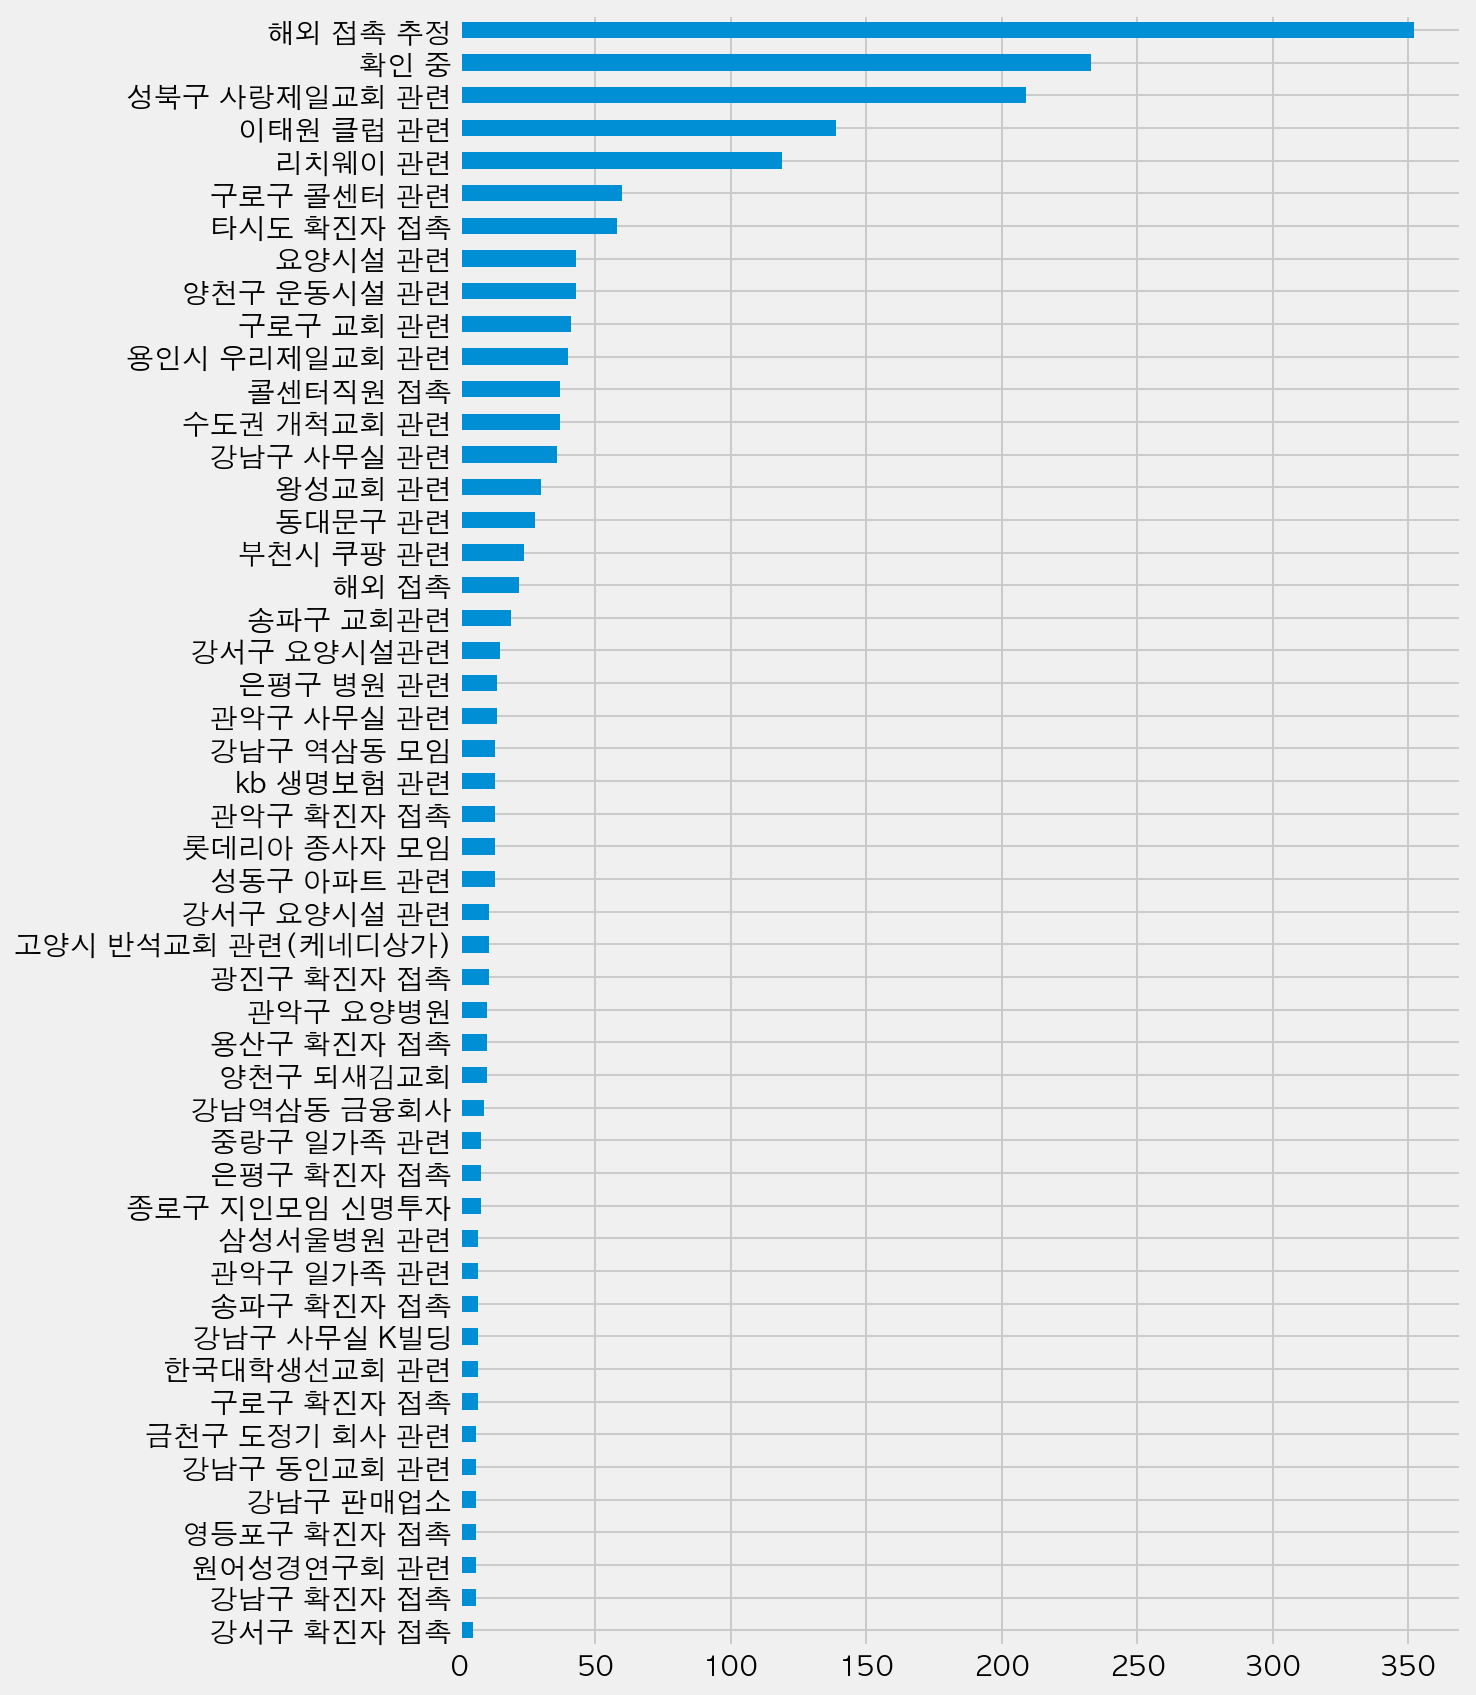

In [32]:
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(50)
g = contact_count_top.plot.barh(figsize=(8,14))

In [33]:
top_contact = df["접촉력"].value_counts().head(15)
top_contact

해외 접촉 추정         352
확인 중             233
성북구 사랑제일교회 관련    209
이태원 클럽 관련        139
리치웨이 관련          119
구로구 콜센터 관련        60
타시도 확진자 접촉        58
요양시설 관련           43
양천구 운동시설 관련       43
구로구 교회 관련         41
용인시 우리제일교회 관련     40
콜센터직원 접촉          37
수도권 개척교회 관련       37
강남구 사무실 관련        36
왕성교회 관련           30
Name: 접촉력, dtype: int64

## 감염경로 불명

In [34]:
df_untracked = df[df["접촉력"]=="확인 중"]
df_untracked

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
6,2071,15471,8.16.,성북구,-,확인 중,보라매병원,2020-08-16,8,33,08-16
11,2066,미부여,8.16.,강동구,-,확인 중,생활치료센터(남산유스),2020-08-16,8,33,08-16
14,2063,15499,8.16.,강동구,-,확인 중,서울의료원,2020-08-16,8,33,08-16
42,2035,15399,8.16.,노원구,-,확인 중,생활치료센터(남산유스),2020-08-16,8,33,08-16
59,2018,15402,8.16.,강남구,-,확인 중,서남병원,2020-08-16,8,33,08-16
...,...,...,...,...,...,...,...,...,...,...,...
2021,56,1611,2.25.,고양시,-,확인 중,보라매병원(퇴원),2020-02-25,2,9,02-25
2035,42,996,2.25.,노원구,-,확인 중,보라매병원(퇴원),2020-02-25,2,9,02-25
2038,39,907,2.25.,평택시,-,확인 중,타시도 이관(퇴원),2020-02-25,2,9,02-25
2039,38,935,2.25.,관악구,-,확인 중,삼육서울병원(퇴원),2020-02-25,2,9,02-25


<AxesSubplot:xlabel='월,주'>

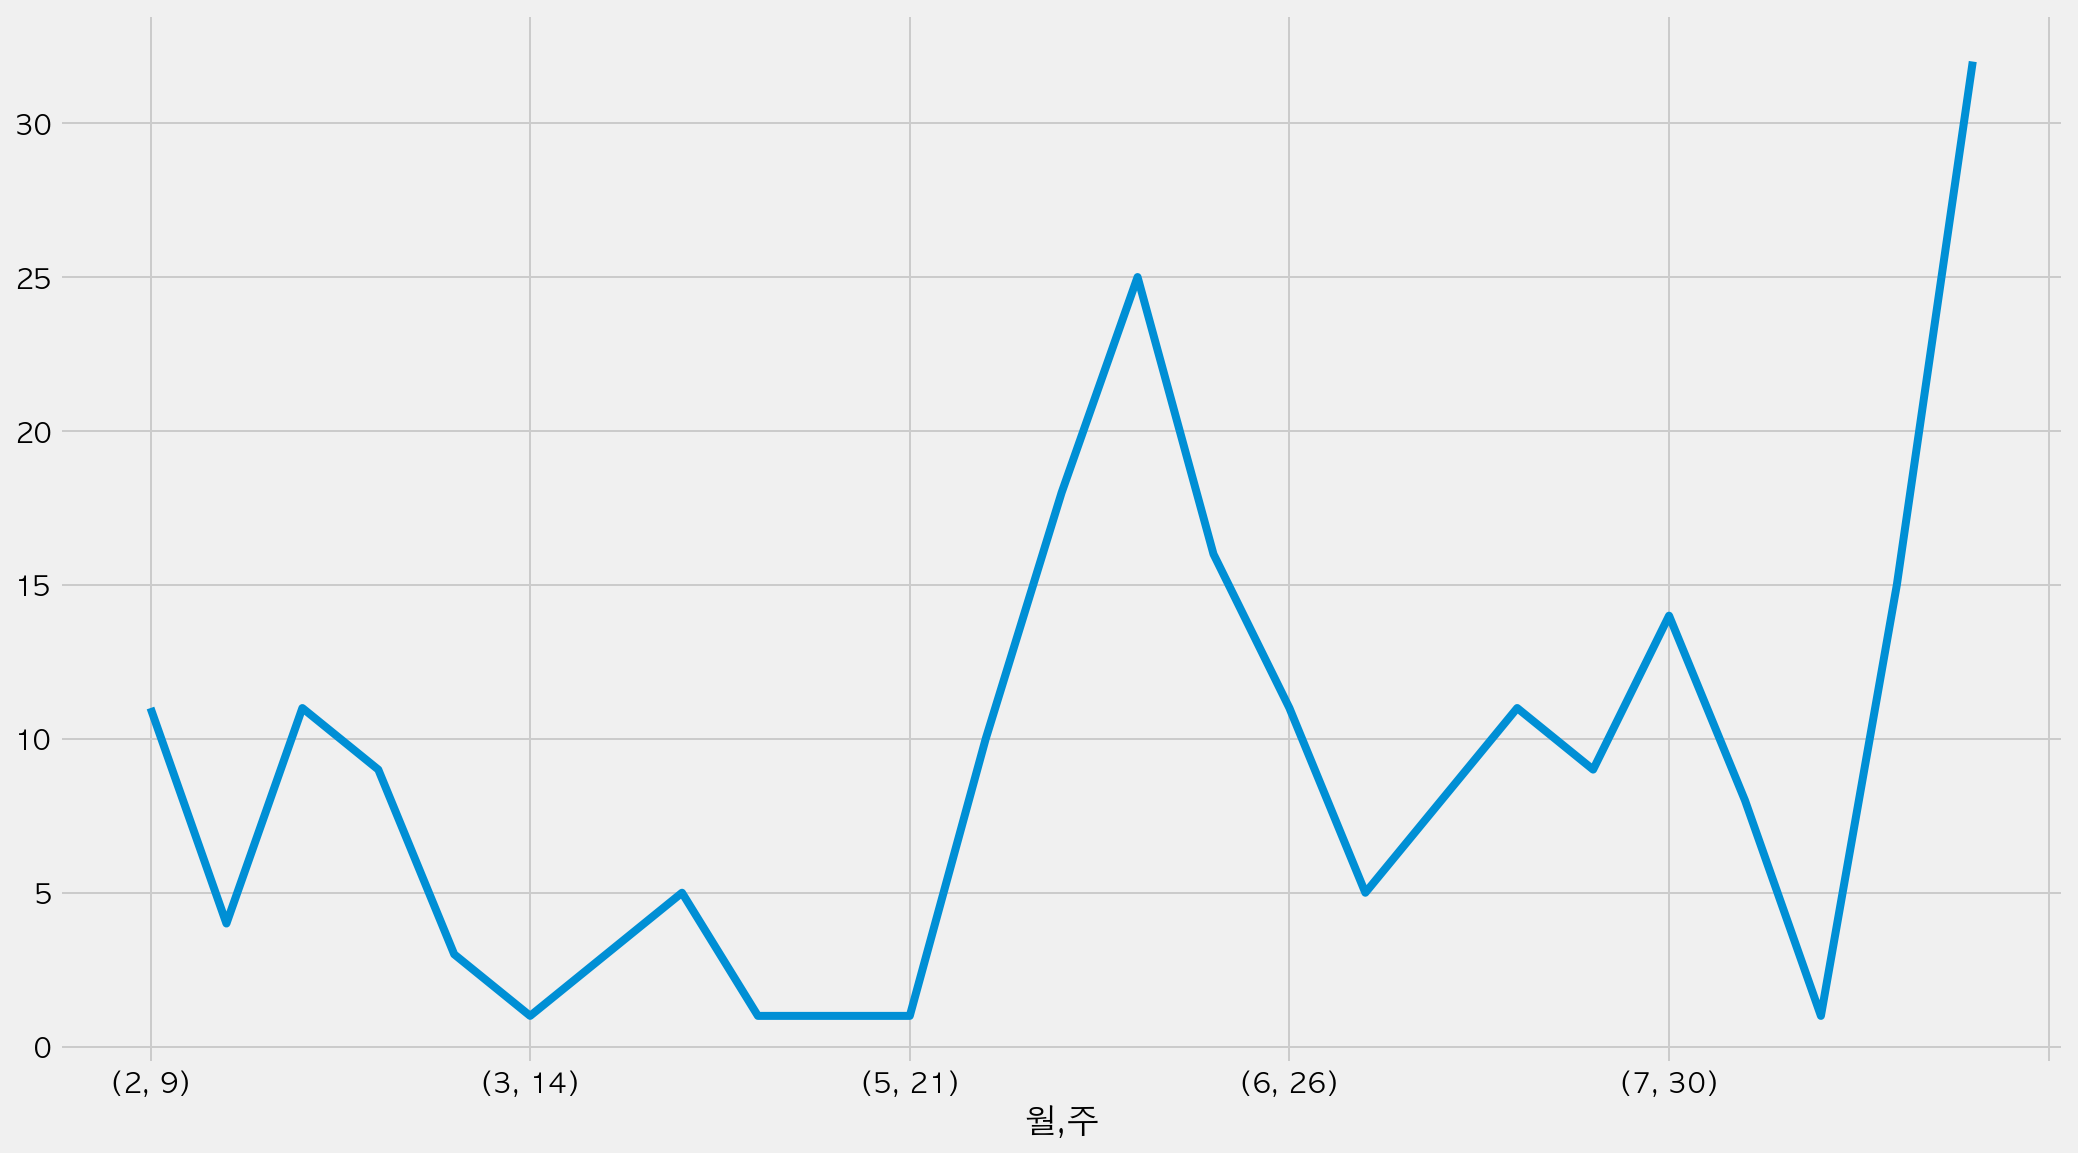

In [35]:
untracked_weekly_case = df_untracked.groupby(["월","주"])["연번"].count()
untracked_weekly_case.plot(figsize=(16,9))

In [36]:
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진자수"]
all_weekly_case.head()

,전체확진자수
33,389
23,134
14,128
24,125
11,124


In [37]:
untracked_weekly_case = df_untracked["주"].value_counts().to_frame()
untracked_weekly_case.columns = ["불명확진수"]
untracked_weekly_case.head()

,불명확진수
33,32
24,25
23,18
25,16
32,15


In [38]:
comparison = all_weekly_case.merge(untracked_weekly_case, left_index=True, right_index=True).sort_index()
comparison

,전체확진자수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,9
13,105,3
14,128,4
15,47,5
16,15,1
20,48,1
21,39,1


<AxesSubplot:>

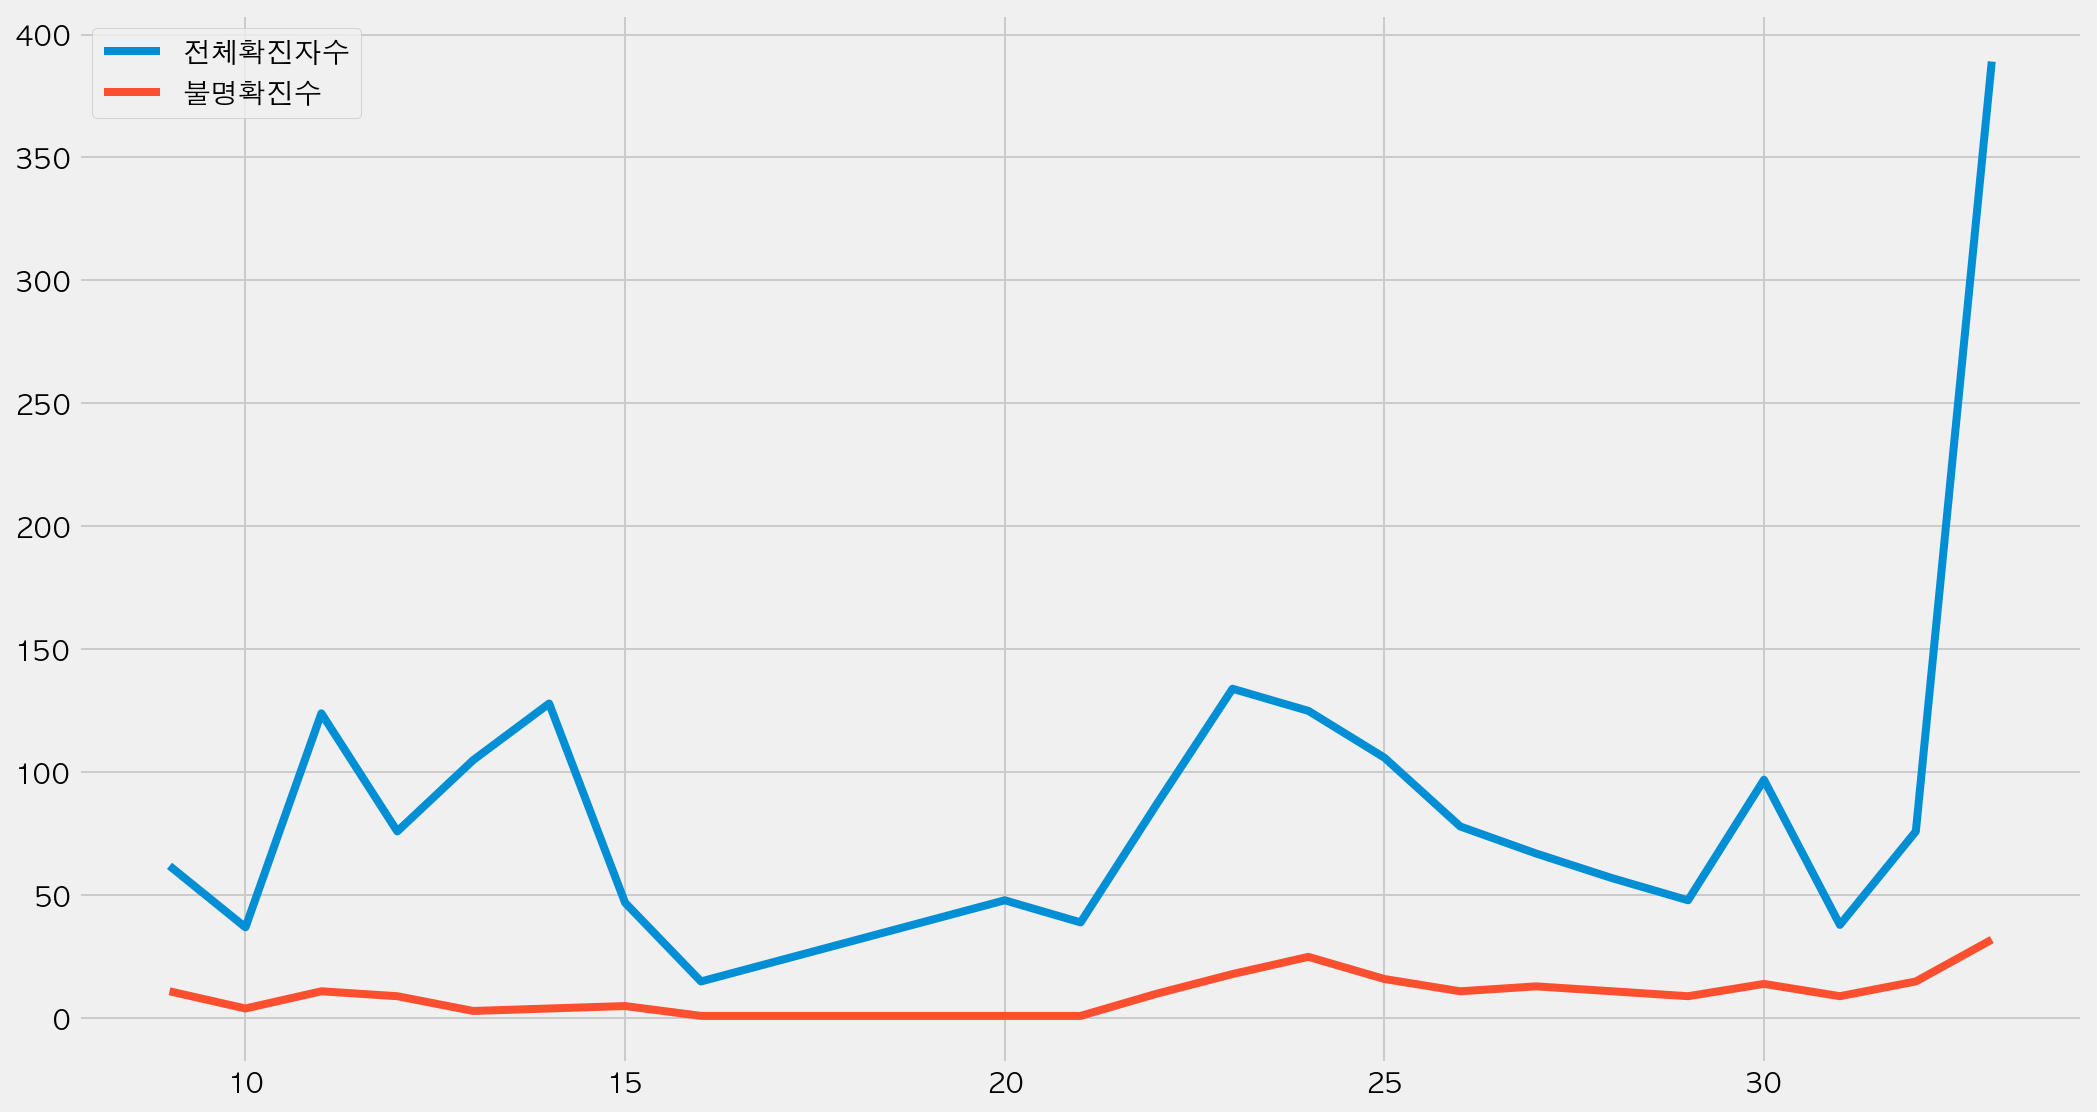

In [39]:
compare_graph = comparison.plot(figsize=(16,9))
compare_graph

In [40]:
percentages = (comparison["불명확진수"] / comparison["전체확진자수"]) * 100
percentages

9     17.741935
10    10.810811
11     8.870968
12    11.842105
13     2.857143
14     3.125000
15    10.638298
16     6.666667
20     2.083333
21     2.564103
22    11.494253
23    13.432836
24    20.000000
25    15.094340
26    14.102564
27    19.402985
28    19.298246
29    18.750000
30    14.432990
31    23.684211
32    19.736842
33     8.226221
dtype: float64

20.0
19.402985074626866
19.298245614035086
18.75
23.684210526315788
19.736842105263158


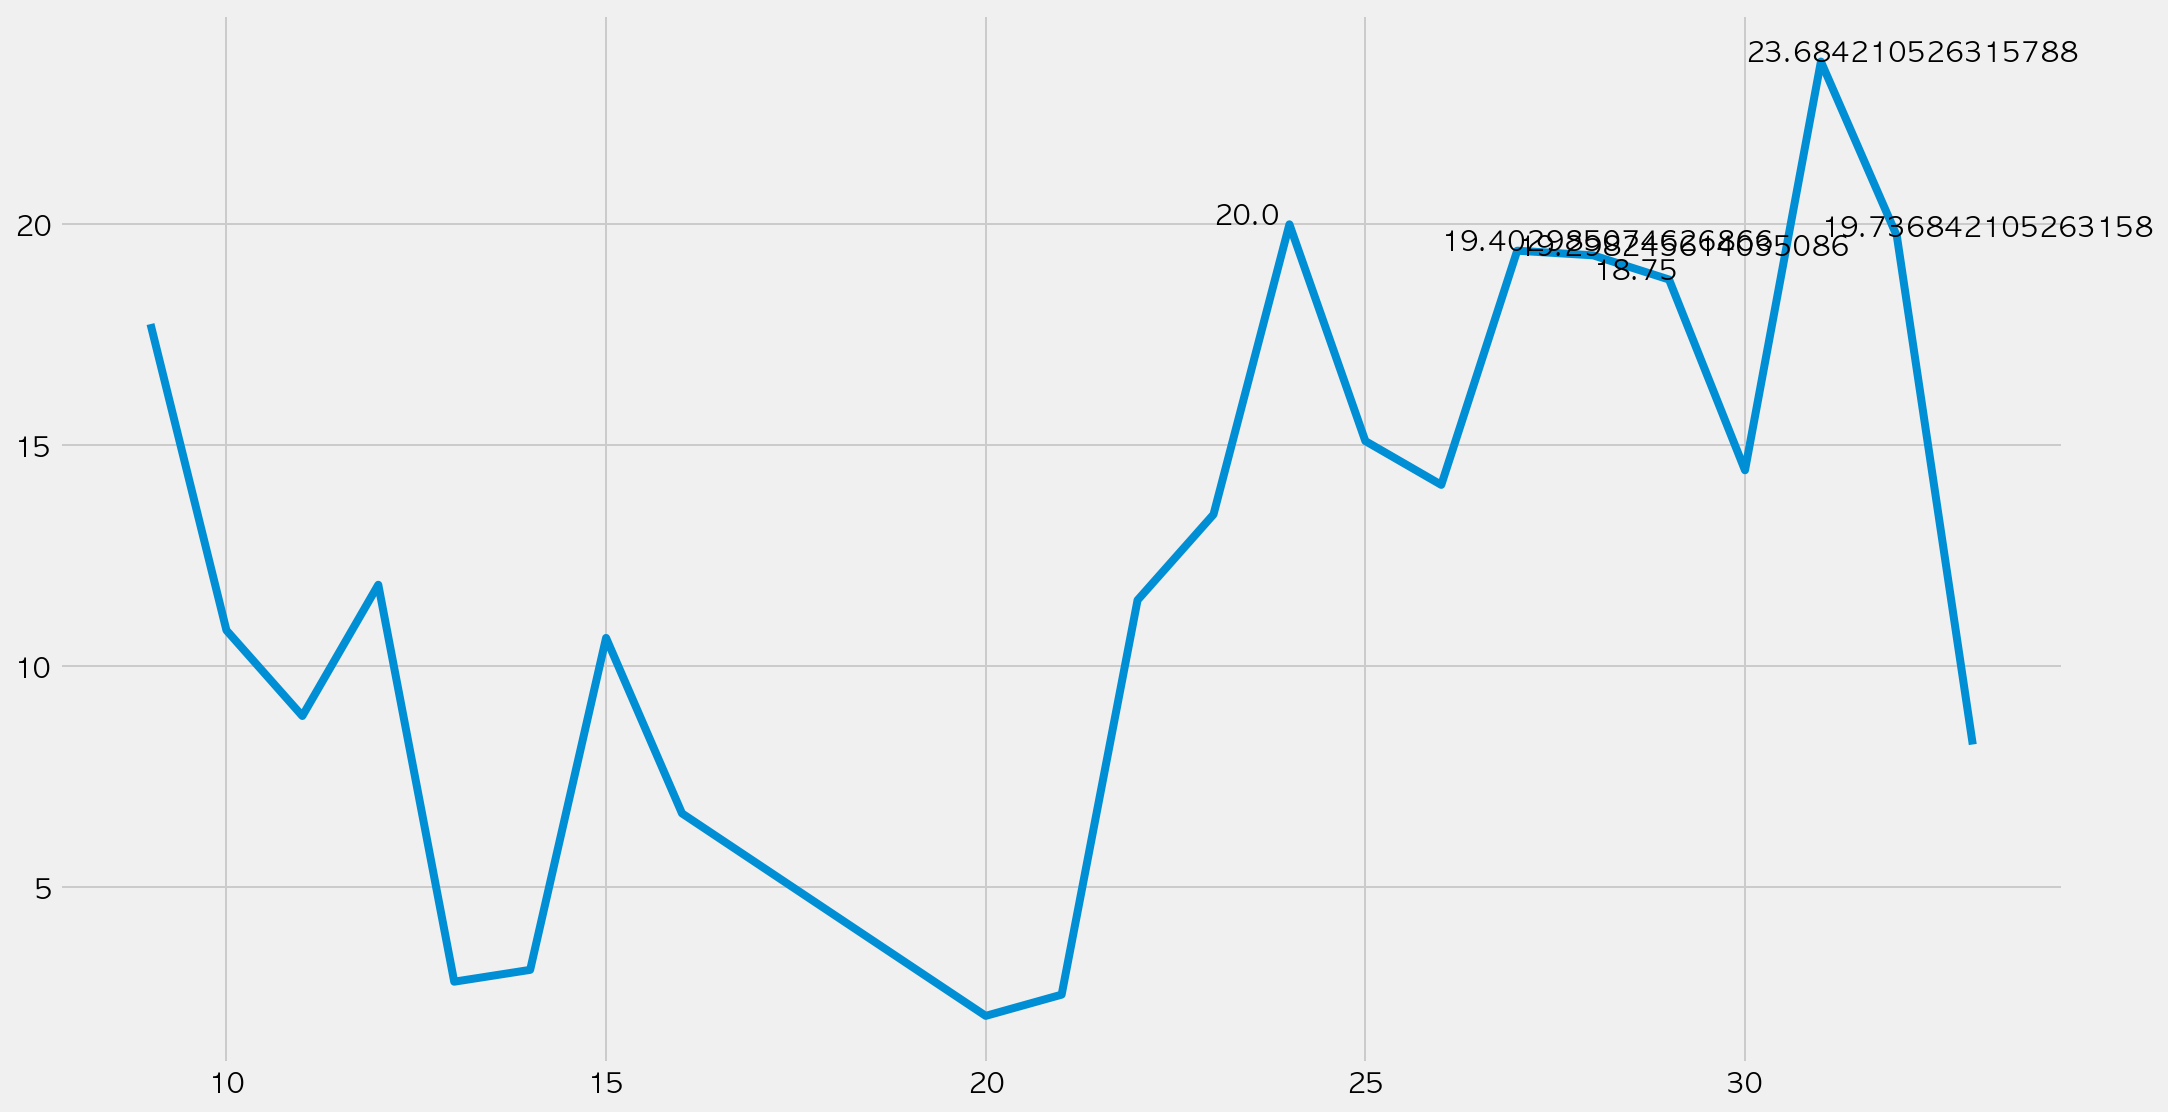

In [41]:
percentage_graph = percentages.plot(figsize=(16,9))

for i in range(len(percentages)):
    percent = percentages.iloc[i]
    if percent > 18:
        print(percentages.iloc[i])
        percentage_graph.text(x=i+11, y=percentages.iloc[i], s=percentages.iloc[i])